# Machine Learning topological phases in real space: Nearest and second nearest-neighbours SSH model.

In [1]:
#%load_ext autoreload
#%autoreload 

In [2]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Running models with SSH data

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import *

In [4]:
### YOU MAY NEED TO CHANGE THE CSV FILENAME!!!
csv_path = "/home/rio/data/phase_transitions/csv/second_neighbours_open_6561_50.csv"     
model = RandomForestClassifier(n_estimators=25,criterion="entropy",n_jobs=-1)
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!!!
allowed_windings = [-1,0,1,2]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!!!
val_split = 0.5  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!!!!!
random_state = 123                    

dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings, \
             "simulation_dir": simulation_dir, "val_split": val_split, \
             "features_to_use": features_to_use, "shuffle_features": shuffle_features, 
             "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat99
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025


#### Unque winding values

In [5]:
np.unique(simulation.dataframe.phase.values)

array([ -1,   0,   1,   2, 999], dtype=int32)

#### Checking initialization

In [6]:
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2


In [7]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8414875781130925
% val:  0.0
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  5521
number of val hamiltonians:  0
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 

## Running a simulation

In [8]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [1:25:22<00:00, 51.14s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.018648,-0.011856,...,-0.035526,-0.023898,-0.024652,0.054743,0.037192,-0.019603,-0.007444,-0.020456,-0.011856,0.018648
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.001667,0.009061,...,0.043322,-0.059866,-0.041062,0.006819,0.000272,0.032528,0.017980,-0.023590,-0.009061,-0.001667
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.037068,0.023790,...,-0.067409,-0.045178,-0.048010,0.105150,0.073000,-0.037989,-0.014562,-0.040624,-0.023790,0.037068
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.003692,0.017921,...,-0.083711,0.113140,0.079526,-0.012099,0.000192,-0.064157,-0.035888,0.046388,0.017921,0.003692
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.055025,0.035882,...,0.092396,0.061440,0.068817,-0.147201,-0.106074,0.054012,0.021030,0.060215,0.035882,-0.055025
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.018648,0.011856,...,-0.035526,0.023898,-0.024652,-0.054743,0.037192,0.019603,-0.007444,0.020456,-0.011856,-0.018648
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.001667,0.009061,...,-0.043322,-0.059866,0.041062,0.006819,-0.000272,0.032528,-0.017980,-0.023590,0.009061,-0.001667
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.055025,0.035882,...,-0.092396,0.061440,-0.068817,-0.147201,0.106074,0.054012,-0.021030,0.060215,-0.035882,-0.055025
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,2,test,0.003692,-0.017921,...,-0.083711,-0.113140,0.079526,0.012099,0.000192,0.064157,-0.035888,-0.046388,0.017921,-0.003692
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.037068,0.023790,...,0.067409,-0.045178,0.048010,0.105150,-0.073000,-0.037989,0.014562,-0.040624,0.023790,0.037068


#### Viewing a random sample

In [9]:
simulation.dataframe.sample(frac=0.1, replace=False)

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat90,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99
186340,1863,H_-0.85_-2_2.00552.dat,-0.85,-2.00,2.005517,2,2,val,0.179774,0.100975,...,-0.021045,0.030346,0.044687,-0.036413,-0.177692,-0.044692,0.037473,-0.114826,0.100975,0.179774
298352,2983,H_-0.2_1.35_2.00105.dat,-0.20,1.35,2.001050,2,2,train,0.037272,-0.017028,...,0.143528,-0.059941,-0.034309,0.106832,0.047156,-0.162365,-0.098588,0.067681,-0.017028,0.037272
162889,1628,H_-1_-1.6_2.0094.dat,-1.00,-1.60,2.009401,2,2,val,0.085358,0.043362,...,-0.106468,-0.187625,-0.015998,-0.170789,-0.038938,-0.180397,0.024214,-0.107280,-0.043362,-0.085358
305337,3053,H_-0.15_0.8_0.000513756.dat,-0.15,0.80,0.000514,0,0,val,0.152250,-0.079273,...,-0.134435,0.022860,-0.086513,0.137938,0.076520,0.076845,0.131459,-0.071033,0.079273,-0.152250
273717,2737,H_-0.35_1.2_0.000734722.dat,-0.35,1.20,0.000735,0,0,train,0.055199,0.007283,...,0.142940,0.123320,0.126561,0.141970,0.089897,0.134330,0.038705,0.099706,0.007283,0.055199
639208,6392,H_1.9_1.7_-1.02334.dat,1.90,1.70,-1.023341,-1,-1,test,0.058506,-0.045677,...,0.138842,-0.139409,0.130540,-0.136141,0.109611,-0.117955,0.072434,-0.094307,0.045677,-0.058506
1844,18,H_-2_-1.1_-1.00627.dat,-2.00,-1.10,-1.006267,-1,-1,val,0.144253,-0.115320,...,0.090080,0.022121,0.038380,-0.019403,0.122175,-0.117025,-0.118705,-0.075135,-0.115320,0.144253
370916,3709,H_0.25_1.2_2.00188.dat,0.25,1.20,2.001884,2,2,val,-0.101522,0.045332,...,-0.089171,0.023846,-0.132614,0.093493,-0.138959,0.134644,-0.090408,0.134193,-0.045332,0.101522
89412,894,H_-1.45_-1.85_2.01668.dat,-1.45,-1.85,2.016682,2,-1,test,-0.062807,0.053424,...,-0.037474,-0.135443,-0.134617,0.167740,0.115634,-0.009430,0.007850,-0.108913,-0.053424,0.062807
59708,597,H_-1.65_-0.5_-1.00344.dat,-1.65,-0.50,-1.003442,-1,-1,train,-0.039070,-0.024379,...,0.158424,0.060161,-0.022783,0.104689,-0.096093,-0.089250,0.051458,-0.023171,0.024379,0.039070


#### Checking train/val/test splits again

In [10]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [945, 5101, 1695, 1586, 2158, 1765, 4727, 1864, 5915, 5646, 5543, 2935, 3868, 3041, 4190, 2019, 5457, 6299, 675, 5613, 2489, 1374, 278, 2989, 5396, 2412, 5559, 6210, 6298, 423, 2411, 4027, 3054, 4521, 2713, 3688, 239, 1839, 4073, 3827, 2117, 2396, 4913, 2257, 1427, 1122, 1338, 2168, 3094, 5127, 3212, 6266, 3217, 3394, 6117, 4394, 606, 3333, 6218, 1846, 5394, 2964, 3162, 3448, 713, 5014, 3663, 5201, 4046, 6181, 3918, 2224, 2578, 4826, 1649, 6320, 6426, 6383, 6182, 586, 5219, 1925, 2228, 209, 5015, 391, 2031, 3029, 5957, 2571, 2141, 4898, 3110, 1411, 971, 626, 133, 3007, 5037, 4819, 5961, 5847, 1335, 1999, 5120, 2825, 2170, 1495, 2827, 4997, 682, 5133, 3019, 1214, 4397, 4461, 2754, 297, 4916, 2323, 2996, 2091, 23, 2311, 19

#### Checking summaries

In [11]:
ham_summary = simulation.hamiltonian_summary
ham_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.36,0.36,0.22,0.06,999,0
1,-2.0,-1.95,test,0.35,0.31,0.25,0.09,-1,-1
2,-2.0,-1.90,test,0.42,0.20,0.33,0.05,-1,-1
3,-2.0,-1.85,test,0.39,0.29,0.25,0.07,-1,-1
4,-2.0,-1.80,test,0.45,0.32,0.19,0.04,-1,-1
5,-2.0,-1.75,test,0.51,0.30,0.14,0.05,-1,-1
6,-2.0,-1.70,test,0.52,0.22,0.23,0.03,-1,-1
7,-2.0,-1.65,test,0.52,0.27,0.16,0.05,-1,-1
8,-2.0,-1.60,test,0.59,0.22,0.17,0.02,-1,-1


In [12]:
len(ham_summary)

6561

In [13]:
eigen_summary = simulation.eigenvector_summary
eigen_summary

,id,phase,pred_phase,type_of
0,0,999,-1,test
1,0,999,-1,test
2,0,999,-1,test
3,0,999,-1,test
4,0,999,0,test
5,0,999,-1,test
6,0,999,-1,test
7,0,999,-1,test
8,0,999,2,test
9,0,999,-1,test


In [14]:
len(eigen_summary)

656100

In [15]:
simulation.accuracy

{'eigenvector_train': 0.9999674031148135,
 'eigenvector_val': 0.974268115942029,
 'eigenvector_test': 0.6983003492433062,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9967391304347826,
 'hamiltonian_test': 0.8789289871944121}

In [16]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [17]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [18]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

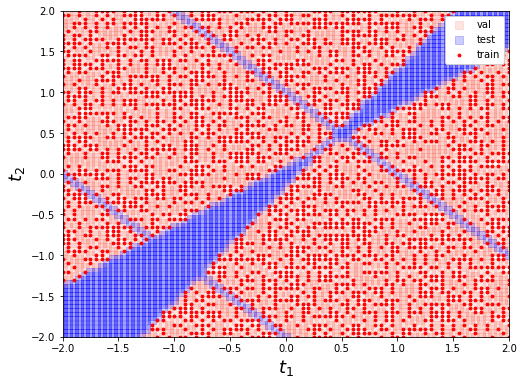

In [19]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [20]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing Experiment class

In [22]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [23]:
experiment.print_train_val_test()

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


#### Viewing dataset summary

In [24]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
 0    0.325122
 1    0.322586
-1    0.178953
 2    0.173338
Name: phase, dtype: float64


total train/val phases: 
 0    1795
 1    1781
-1     988
 2     957
Name: phase, dtype: int64


Summary of test data

% test phases: 
 2    0.399302
-1    0.363213
 1    0.126892
 0    0.110594
Name: phase, dtype: float64


total test phases: 
 2    343
-1    312
 1    109
 0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
 1    0.296238
 0    0.296238
-1    0.203762
 2    0.203762
Name: phase, dtype: float64


total phases: 
 1    1890
 0    1890
-1    1300
 2    1300
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [25]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,2,test
1,0,999,2,test
2,0,999,2,test
3,0,999,2,test
4,0,999,-1,test


#### Viewing Hamiltonian summary

In [26]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.20,0.41,0.28,0.11,999,0
1,-2.0,-1.95,test,0.27,0.35,0.26,0.12,-1,0
2,-2.0,-1.90,test,0.23,0.38,0.28,0.11,-1,0
3,-2.0,-1.85,test,0.30,0.38,0.25,0.07,-1,0
4,-2.0,-1.80,test,0.37,0.36,0.20,0.07,-1,-1


#### Viewing accuracy

In [27]:
experiment.accuracy

{'eigenvector_train': 0.9999456718580224,
 'eigenvector_val': 0.9719782608695652,
 'eigenvector_test': 0.6845052386495926,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9963768115942029,
 'hamiltonian_test': 0.8719441210710128}

#### Visualizing train/val/test splits with scatter plot

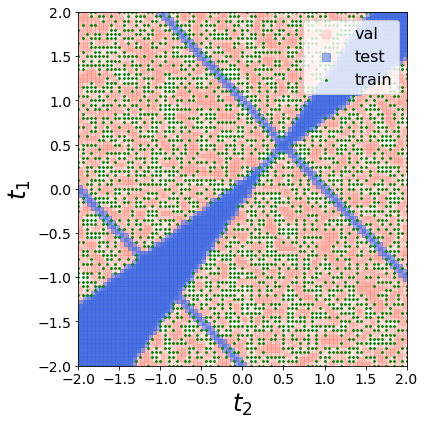

In [28]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

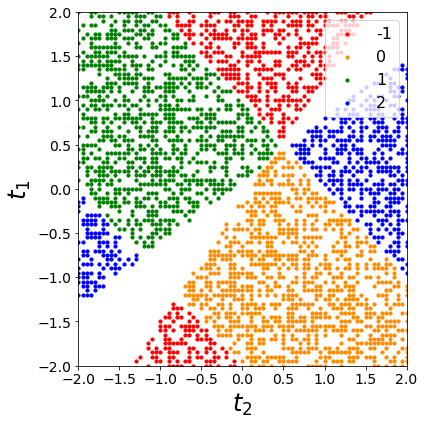

In [29]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

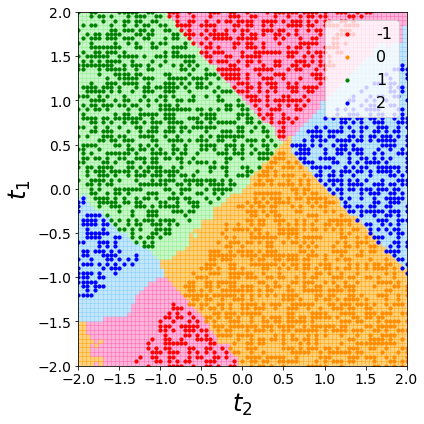

In [30]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, -1: {"marker": "o", "s": 10, "color": "red", "label": -1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}}
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)




#### Plotting Winding Heatmaps (winding -1 = red)

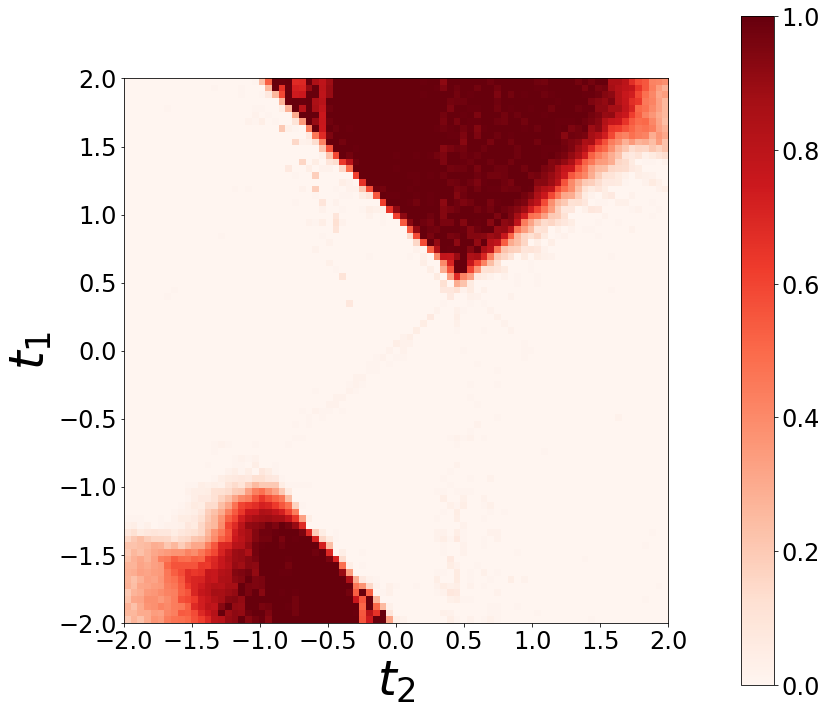

In [31]:
winding = -1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 0 = orange)

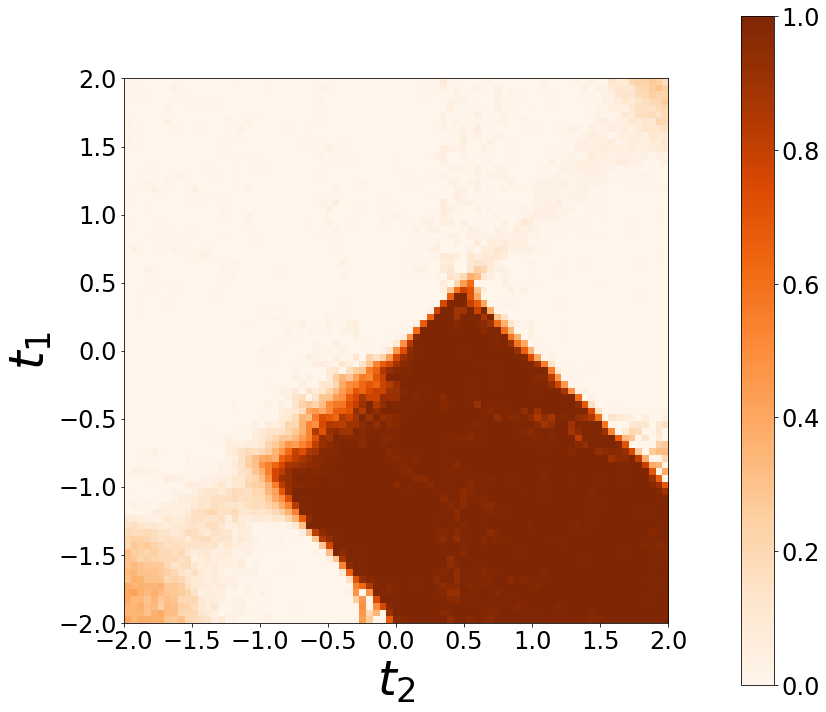

In [32]:
winding = 0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 1 = green)

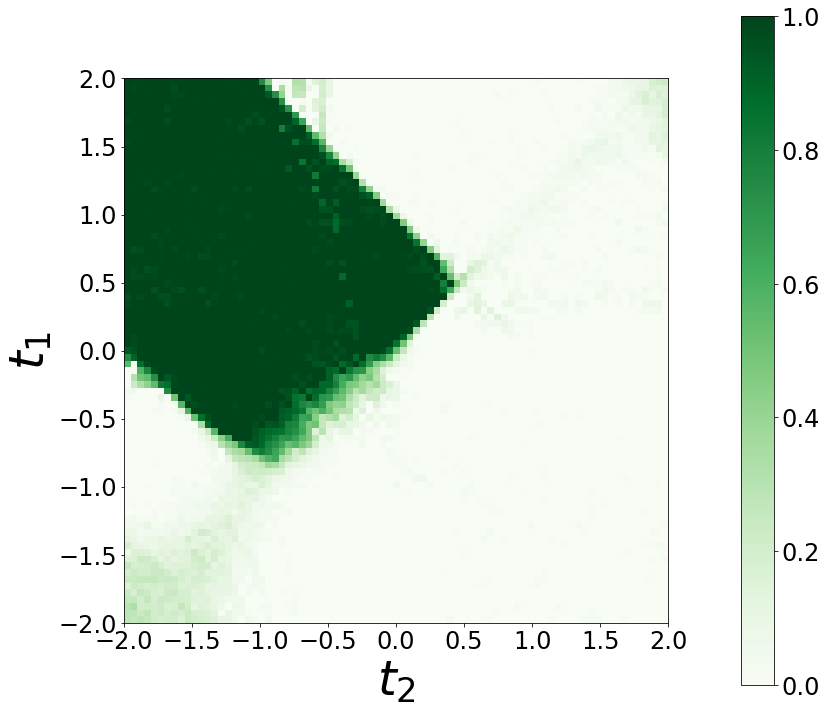

In [33]:
winding = 1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting Winding Heatmaps (winding 2 = blue)

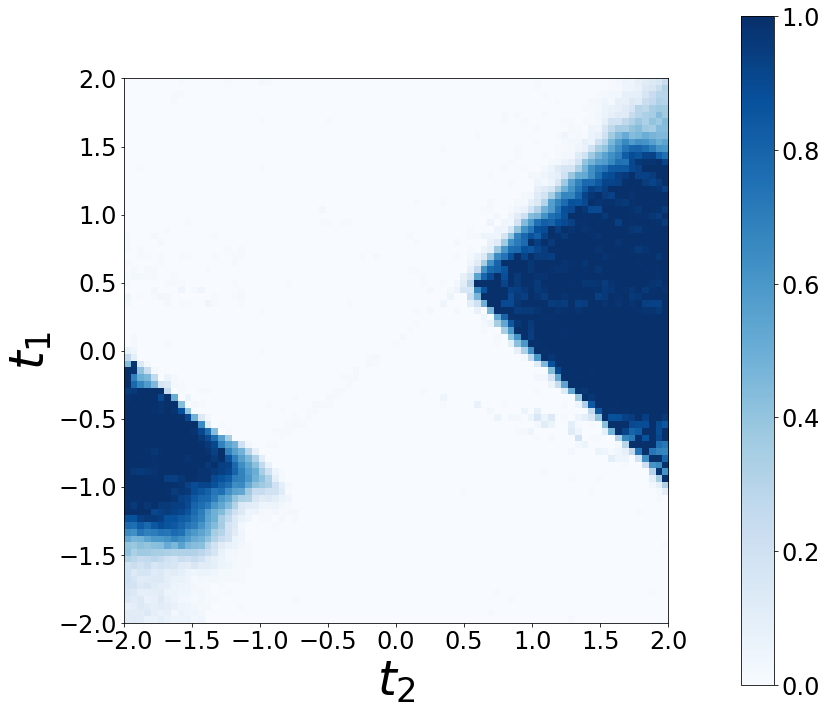

In [34]:
winding = 2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting merged heatmaps

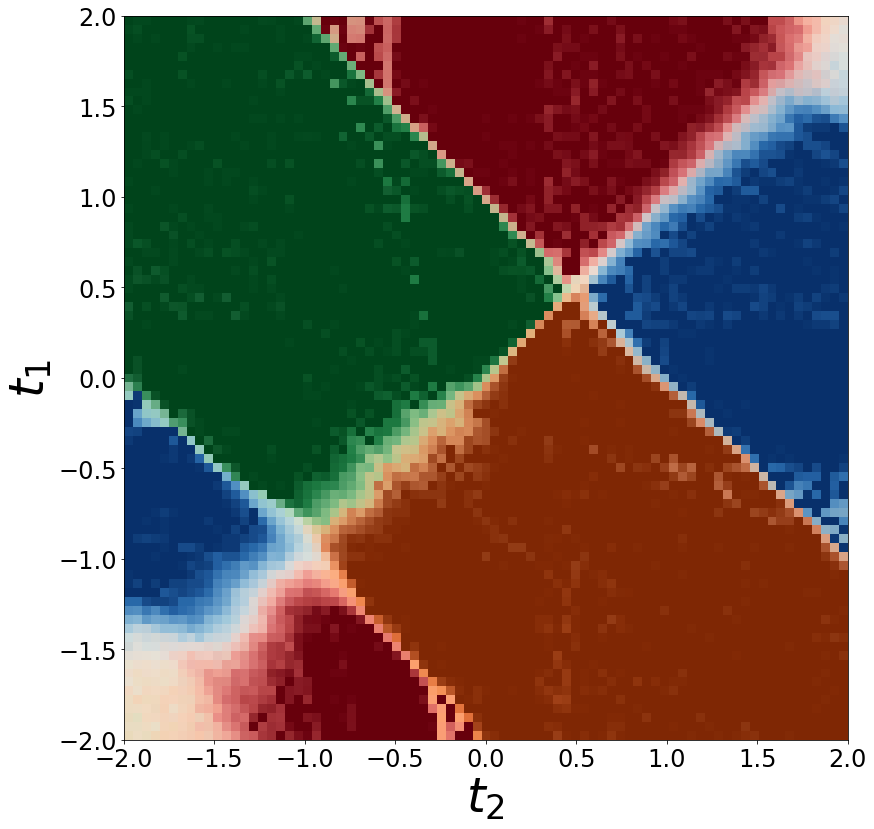

In [35]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
colorbar_params={}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/linneu/Dropbox/Machine/paper_linneu/fig1b-6561-100-merged_winding_grid_0.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [36]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_open_6561_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [38]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 110477.90it/s]


In [39]:
simulation.hamiltonian_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.3043,0.3563,0.2254,0.1140,999,0
1,-2.0,-1.95,test,0.3177,0.3004,0.2624,0.1195,-1,-1
2,-2.0,-1.90,test,0.3384,0.2844,0.2693,0.1079,-1,-1
3,-2.0,-1.85,test,0.3746,0.2799,0.2551,0.0904,-1,-1
4,-2.0,-1.80,test,0.4349,0.2691,0.2151,0.0809,-1,-1
5,-2.0,-1.75,test,0.4800,0.2535,0.2016,0.0649,-1,-1
6,-2.0,-1.70,test,0.5267,0.2296,0.1797,0.0640,-1,-1
7,-2.0,-1.65,test,0.5424,0.2157,0.1759,0.0660,-1,-1
8,-2.0,-1.60,test,0.5757,0.2097,0.1774,0.0372,-1,-1


#### Plotting Simulation Winding Heatmaps (winding -1 = red)

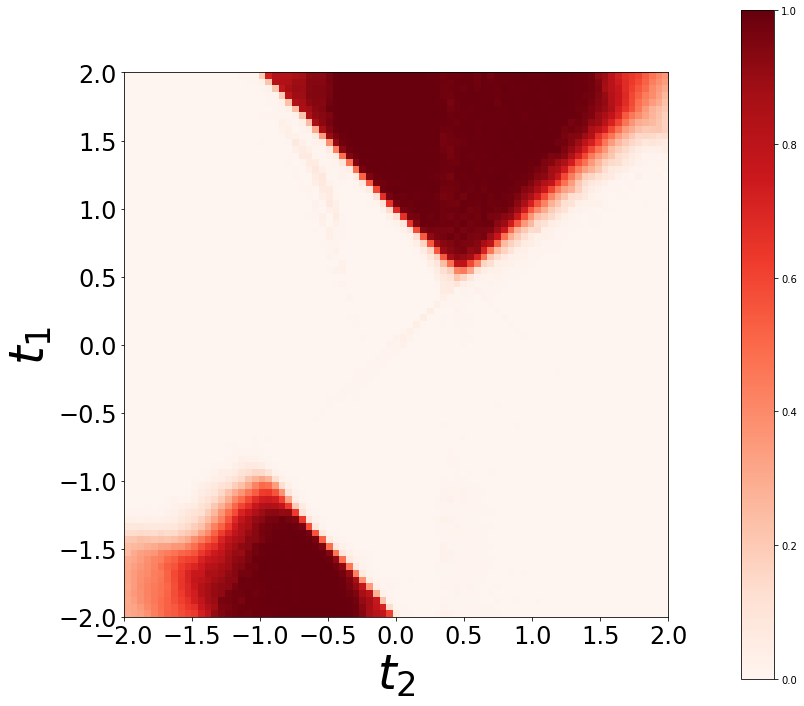

In [40]:
winding =-1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_-1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 0 = orange)

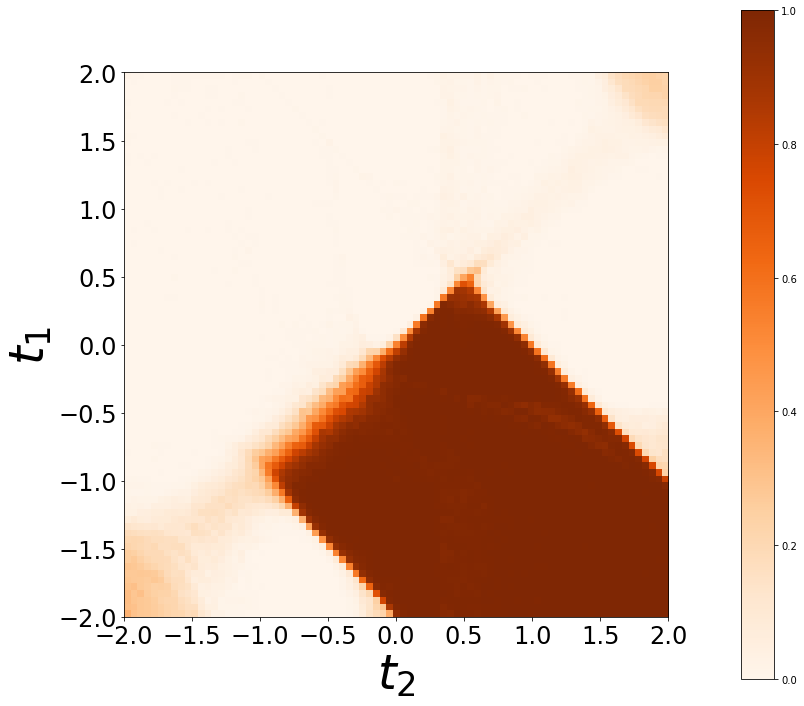

In [41]:
winding =0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_0_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 1 = green)

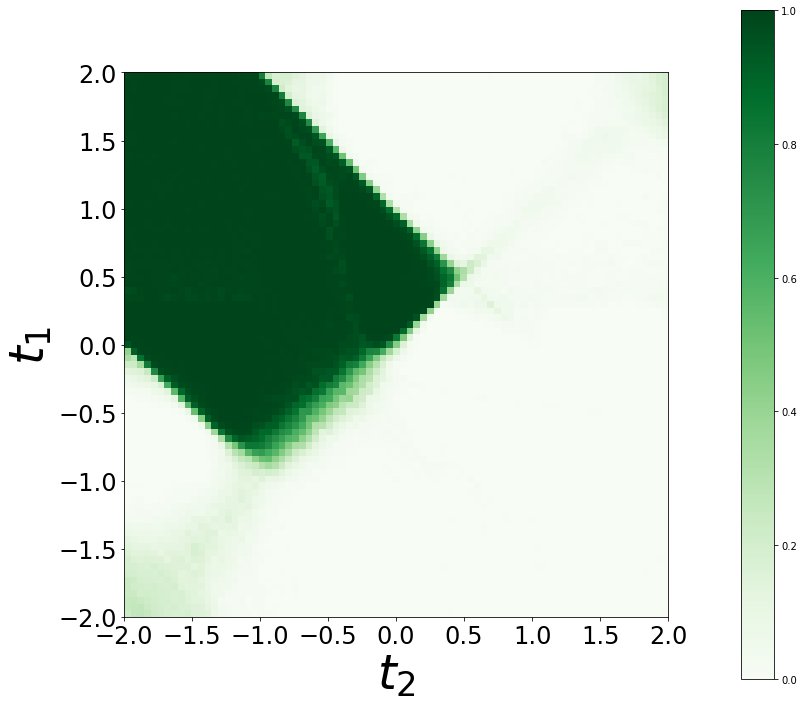

In [42]:
winding =1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 2 = blue)

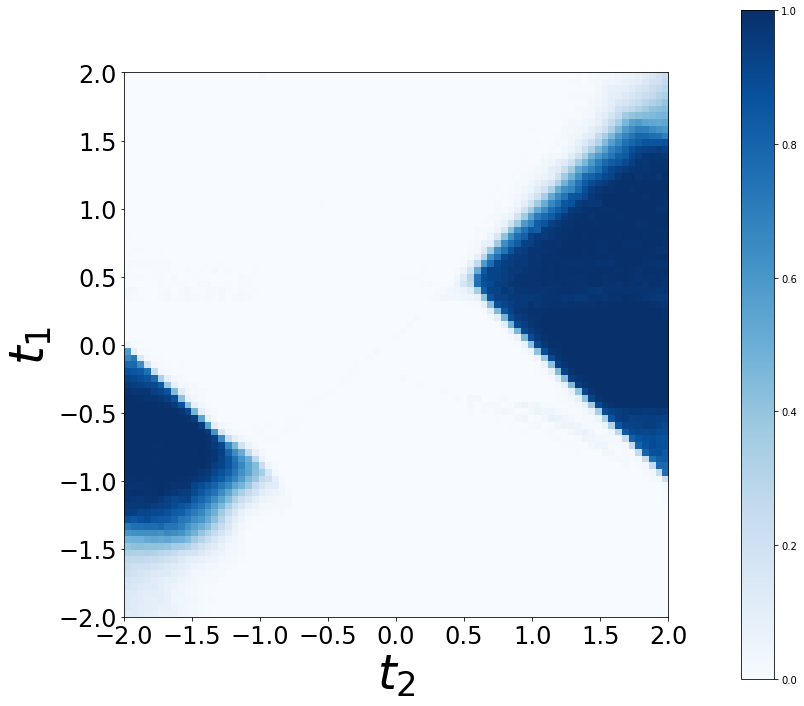

In [43]:
winding =2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_winding_2_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Merged Simulation Winding Heatmaps

Plotting winding -1
Plotting winding 0
Plotting winding 1
Plotting winding 2


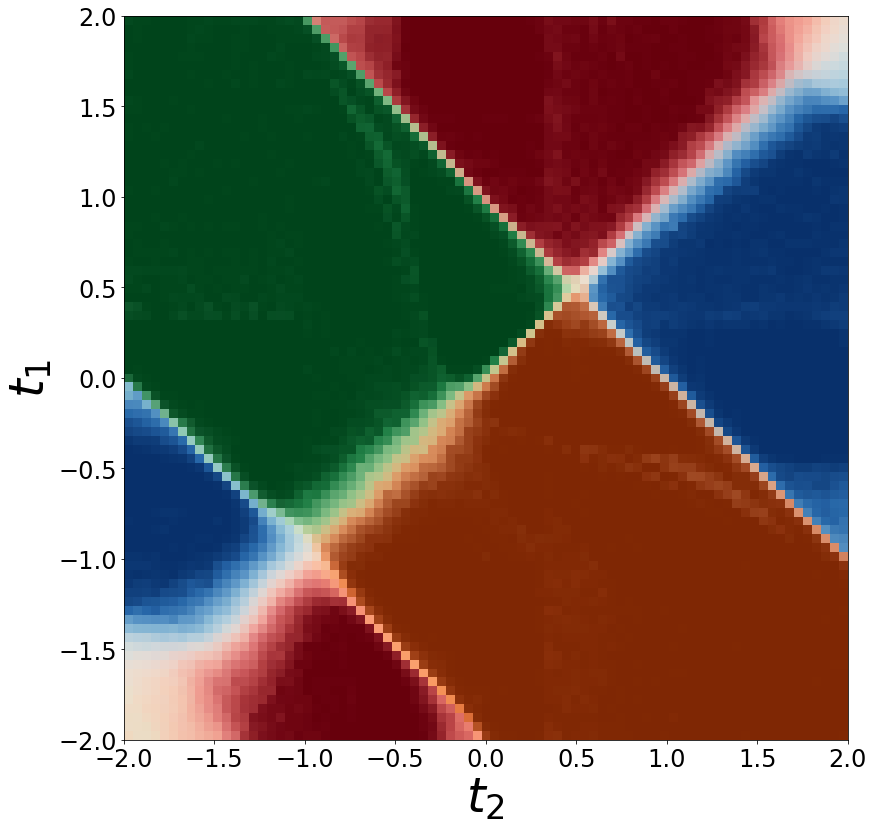

In [44]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None}
colorbar_params={}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [45]:
save_to_disk = False
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


{'eigenvector_train': 0.9999396233248824,
 'eigenvector_val': 0.9743672826086954,
 'eigenvector_test': 0.7057616996507566,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9974275362318837,
 'hamiltonian_test': 0.900838183934808}

#### Computing bootstrap accuracies

In [46]:
save_to_disk = False
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9033760186263097}

#### Computing mean feature importances

In [47]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:15<00:00,  6.28it/s]

Sorted feature importances:  [(1, 0.034081203037621), (98, 0.03392870211214478), (3, 0.026226613361191187), (96, 0.02578961811328168), (0, 0.022885256412415365), (99, 0.022304433406639193), (5, 0.01876451950580552), (94, 0.018299169084659176), (48, 0.01821985603782633), (51, 0.018123587378324122), (2, 0.01780740423889759), (97, 0.017725005923998373), (49, 0.014582317531751548), (50, 0.01445704752097769), (7, 0.014303040125491355), (92, 0.013971761224577878), (4, 0.013962257644688504), (95, 0.01375852957580444), (53, 0.011995145444612616), (6, 0.011927420359920657), (46, 0.011902873915000316), (93, 0.011716111578688203), (9, 0.011659592633399093), (90, 0.011432614639329777), (47, 0.011150144880725459), (52, 0.011001088767035356), (55, 0.010541040106816855), (44, 0.01043924224548981), (11, 0.01010105091073265), (88, 0.009940338080035553), (8, 0.009794035065763877), (91, 0.009724125828353658), (45, 0.009281392471170501), (54, 0.009260288802099533), (13, 0.008845755729079027), (86, 0.00877

In [48]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plotting feature importances

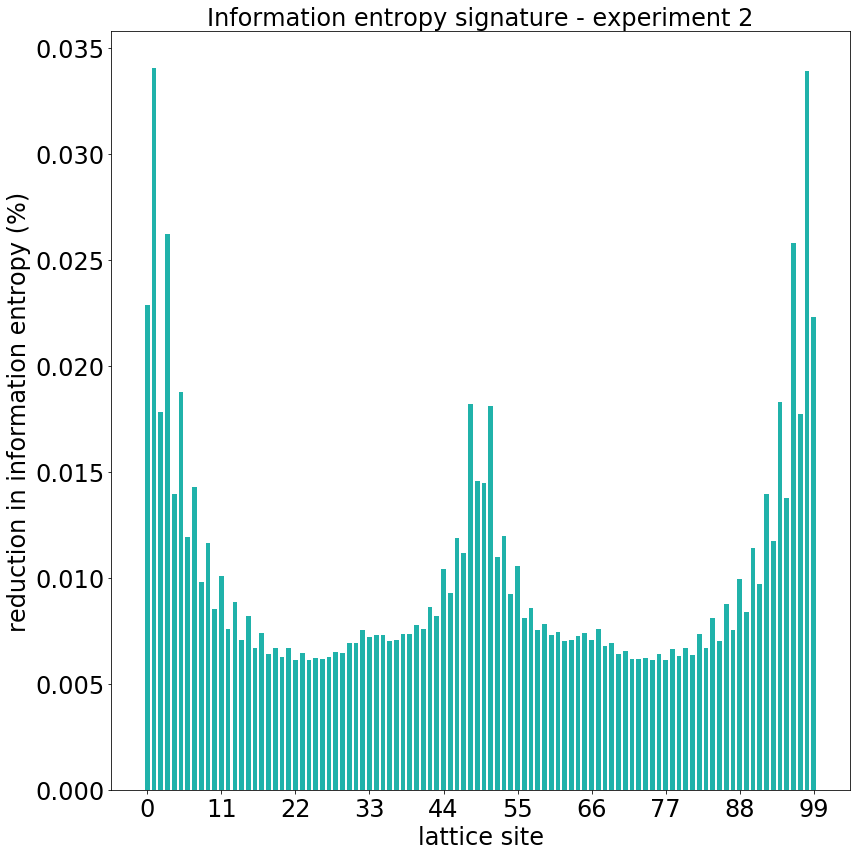

In [49]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "lightseagreen", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

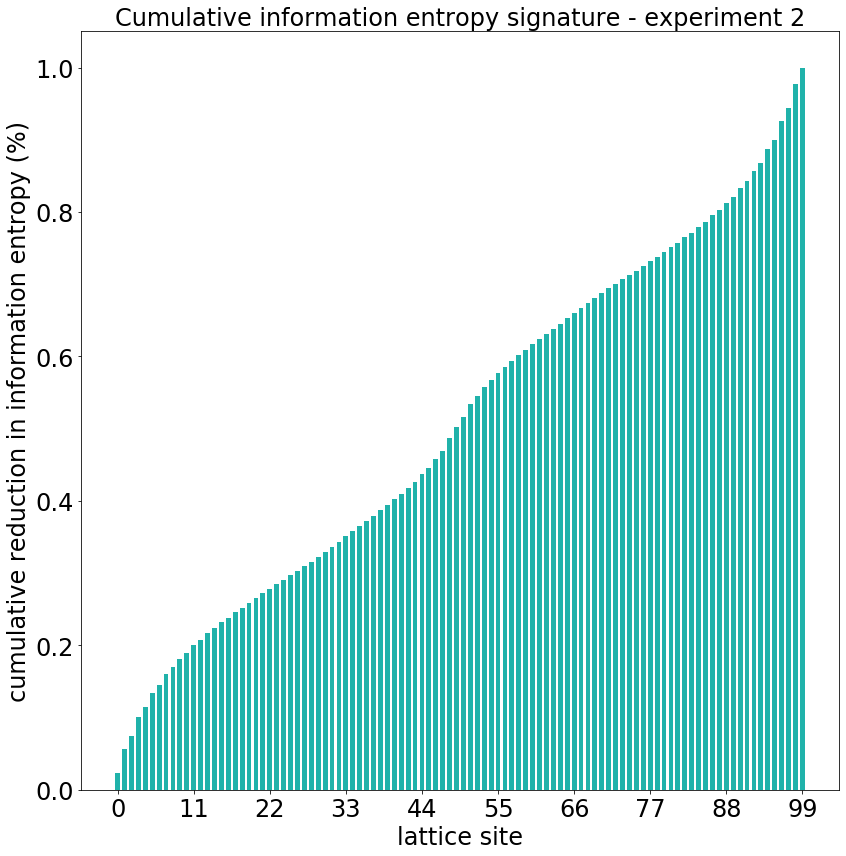

In [50]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"lightseagreen", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_open_6561_50_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)
